#### Introduction
The dataset provides a detailed view of user behavior on social media, capturing various attributes such as demographics, platform usage, productivity loss, and satisfaction. The analysis explores factors influencing productivity loss, examining psychological and behavioral attributes. 

#### Importing

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Data Outline

In [20]:
dt=pd.read_csv('C:/Users/Asus/Downloads/Time-Wasters on Social Media.csv')

In [69]:
dt.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [56]:
dt.head()
#first 5 rows

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [57]:
dt.tail()
#last 5 rows

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi
999,1000,19,Male,India,53840,True,True,driver,Urban,YouTube,...,6,4,Procrastination,Smartphone,Android,4:25 PM,8,2,At home,Mobile Data


In [58]:
dt.columns
#name of all columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

In [59]:
dt.shape
#(rows,columns)

(1000, 31)

In [60]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [61]:
dt.isnull()
dt.isnull().sum()
#check if somewhere in dataset some values are missing or not

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

Text(0, 0.5, 'Productivity Loss')

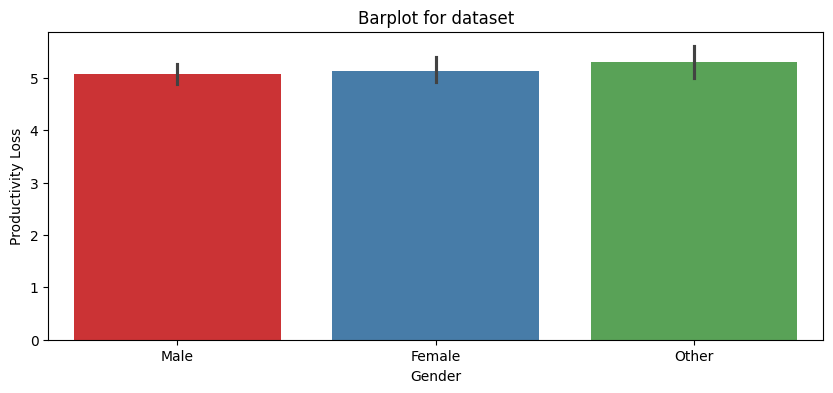

In [88]:
plt.figure(figsize=(10,4))
sns.barplot(data=dt,x='Gender', y='ProductivityLoss',palette='Set1')
plt.title("Barplot for dataset")
plt.xlabel('Gender')
plt.ylabel('Productivity Loss')

Text(0, 0.5, 'Total Time Spent')

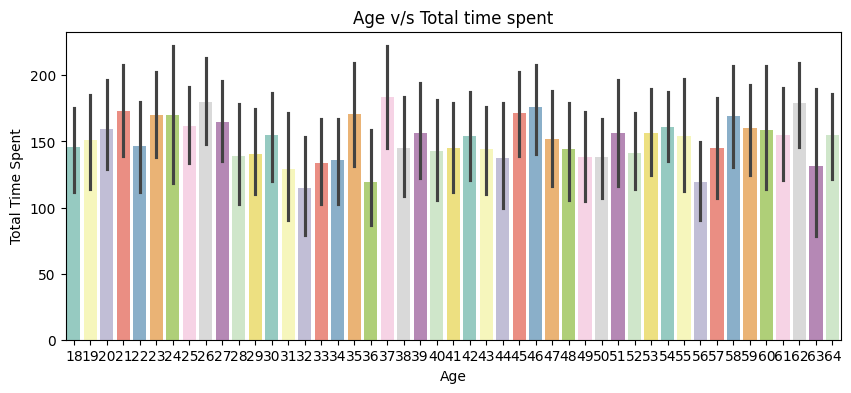

In [97]:
plt.figure(figsize=(10,4))
sns.barplot(data=dt,x='Age', y='Total Time Spent',palette='Set3')
plt.title("Age v/s Total time spent")
plt.xlabel('Age')
plt.ylabel('Total Time Spent')

Text(0, 0.5, 'Platform')

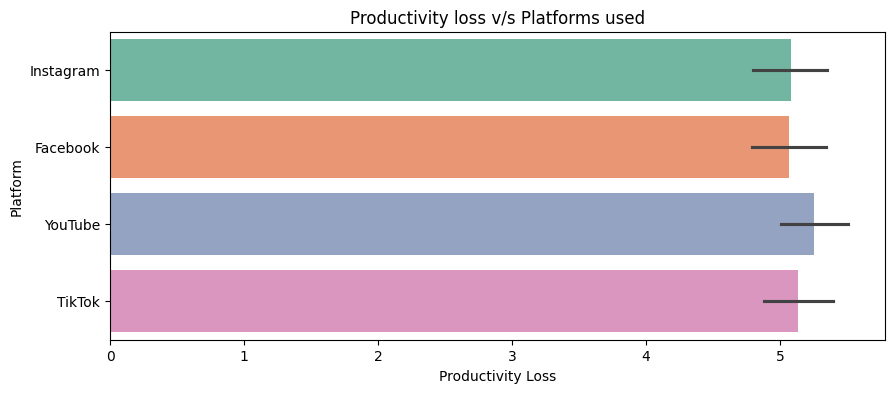

In [90]:
plt.figure(figsize=(10,4))
sns.barplot(data=dt,x='ProductivityLoss', y='Platform',palette='Set2')
plt.title("Productivity loss v/s Platforms used")
plt.xlabel('Productivity Loss')
plt.ylabel('Platform')

Text(0, 0.5, 'Number of Users')

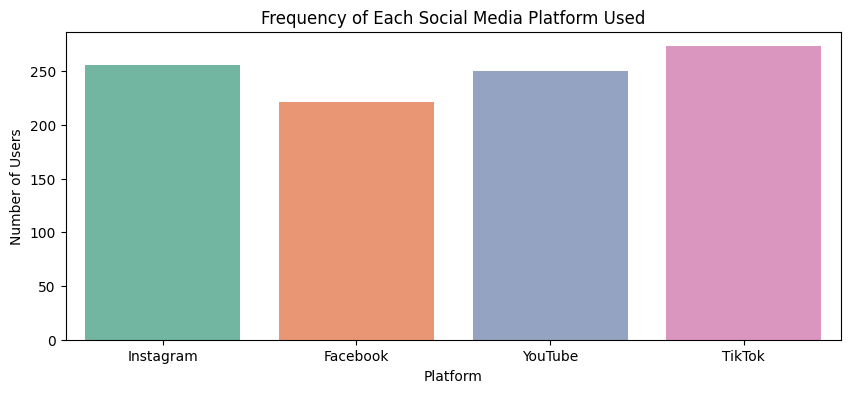

In [91]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dt, x='Platform', palette='Set2')
plt.title('Frequency of Each Social Media Platform Used')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

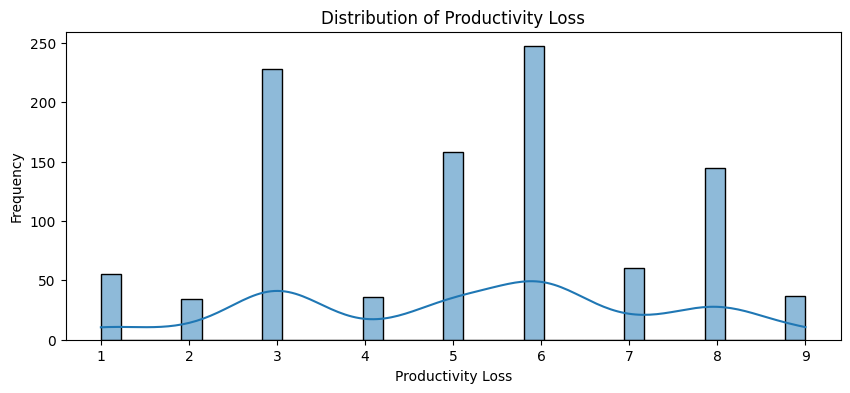

In [ ]:
# Plot distribution of productivity loss
plt.figure(figsize=(10, 4))
sns.histplot(dt['ProductivityLoss'], kde=True, bins=35)
plt.title('Distribution of Productivity Loss')
plt.xlabel('Productivity Loss')
plt.ylabel('Frequency')
plt.show()

* Distribution of Productivity Loss:
The histogram shows how productivity loss is distributed among users.

In [21]:
numeric_features = ['Age', 'Income', 'Satisfaction', 'Self Control', 'Addiction Level', 'ProductivityLoss']

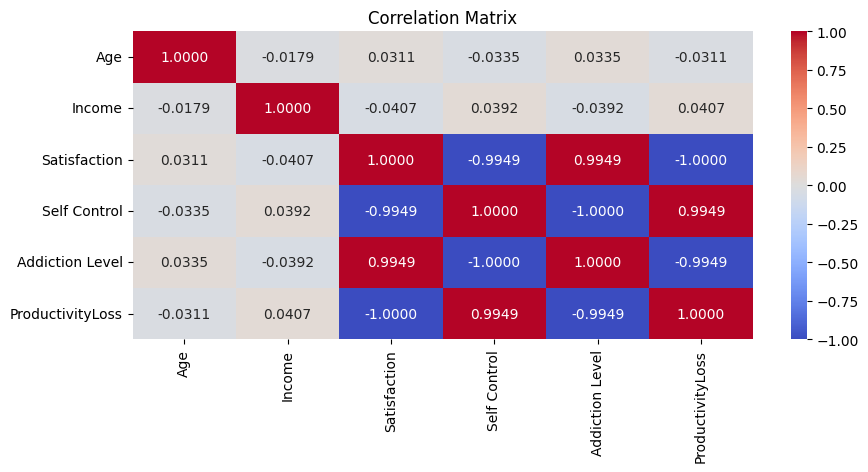

In [ ]:
# Correlation matrix to identify relationships between features
plt.figure(figsize=(10, 4))
c_matrix = dt[numeric_features].corr()
sns.heatmap(c_matrix, annot=True, fmt='.4f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Correlation Matrix:
The heatmap reveals the relationships between various features.

#### Predictive Modeling

0.06774999999999999 , 0.9924403872360043


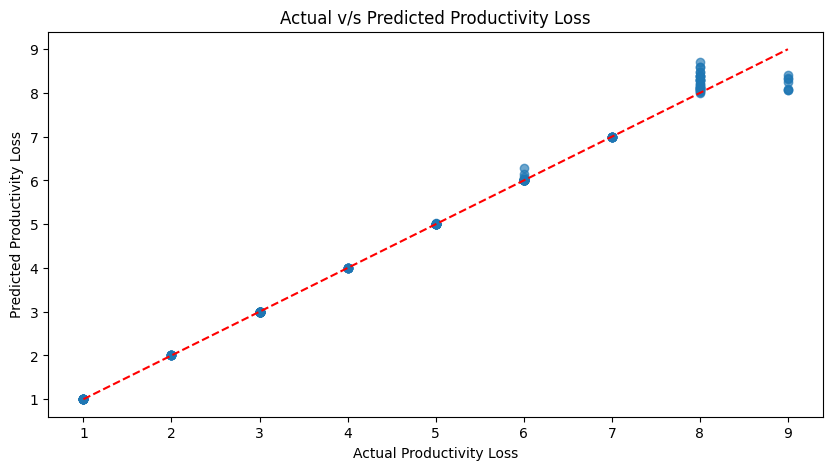

In [14]:
# Dropping columns with high cardinality or less relevance for simplicity
selected_features = ['Age', 'Gender', 'Income', 'Debt', 'Owns Property', 
                     'Profession', 'Demographics', 'Platform', 
                     'Watch Reason', 'DeviceType','Self Control','Addiction Level']

# Encode categorical variables
data_encoded = pd.get_dummies(dt[selected_features], drop_first=True)

# Define target variable
X = data_encoded
y = dt['ProductivityLoss']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print(mae,",",r2)

# Plot actual vs predicted productivity loss
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_predict, alpha=0.65)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Productivity Loss')
plt.ylabel('Predicted Productivity Loss')
plt.title('Actual v/s Predicted Productivity Loss')
plt.show()


* Model Evaluation:
Mean Absolute Error (MAE): 0.067, R-squared (R2) Score: 0.99, The very high R-squared value indicates that the model explains almost all the variability in the productivity loss, while the low MAE suggests high accuracy in predictions.

* Actual vs Predicted Productivity Loss:The scatter plot shows a strong correlation between actual and predicted productivity loss values, indicating the model's effectiveness.

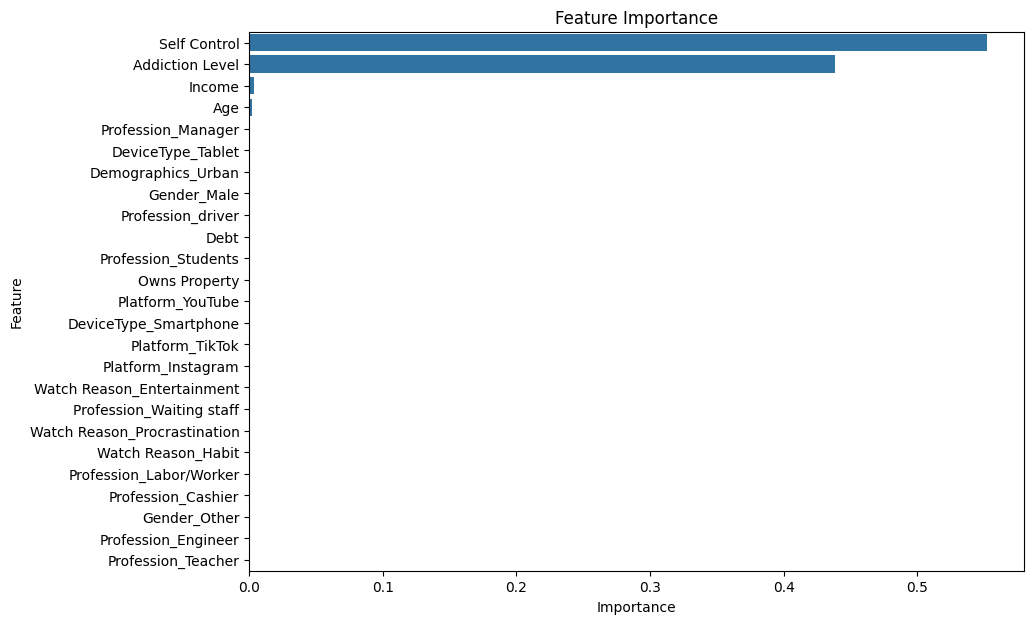

,Feature,Importance
4,Self Control,0.552191
5,Addiction Level,0.437982
1,Income,0.003799
0,Age,0.001830
11,Profession_Manager,0.000568
24,DeviceType_Tablet,0.000437
16,Demographics_Urban,0.000301
6,Gender_Male,0.000292
15,Profession_driver,0.000280
2,Debt,0.000258


In [16]:
# Calculate feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importance DataFrame
feature_importance_df

1. Satisfaction: This is the most significant feature. Higher satisfaction levels may correlate with lower productivity loss as users feel more fulfilled and less likely to overuse social media.
2. Self Control: Users with higher self-control experience less productivity loss, highlighting the importance of self-regulation.
3. Addiction Level: A higher addiction level significantly increases productivity loss, indicating the need for strategies to manage addictive behavior.